<a href="https://colab.research.google.com/github/jupiterthought/my-reposito/blob/main/Devika%20Thilakan.Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("")

In [ ]:
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
data.shape

(178, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
data.drop(['Alcohol','Ash', 'Ash_Alcanity', 'Magnesium','Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],axis=1)

Malic_Acid  Total_Phenols
0          1.71           2.80
1          1.78           2.65
2          2.36           2.80
3          1.95           3.85
4          2.59           2.80
..          ...            ...
173        5.65           1.68
174        3.91           1.80
175        4.28           1.59
176        2.59           1.65
177        4.10           2.05

[178 rows x 2 columns]

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12528 sha256=9868b64a66d4ea079ef2f700d26650eaa75f3b87794aca6fbe09b6d711a39271
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built KMeans


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,16):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans=kmeans.fit(data)
  wcss.append(kmeans.inertia_)


In [ ]:
plt.plot(range(1,16),wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [ ]:
y_kmeans

array([1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 3,
       1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
sil_kmeans=silhouette_score(data,y_kmeans)

In [ ]:
sil_kmeans

0.5669477723599623

In [ ]:
#Agglomerative clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Wine_clust.csv")

In [ ]:
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
data.drop(['Alcohol','Ash', 'Ash_Alcanity', 'Magnesium','Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],axis=1)

Malic_Acid  Total_Phenols
0          1.71           2.80
1          1.78           2.65
2          2.36           2.80
3          1.95           3.85
4          2.59           2.80
..          ...            ...
173        5.65           1.68
174        3.91           1.80
175        4.28           1.59
176        2.59           1.65
177        4.10           2.05

[178 rows x 2 columns]

In [ ]:
import scipy.cluster.hierarchy as sh

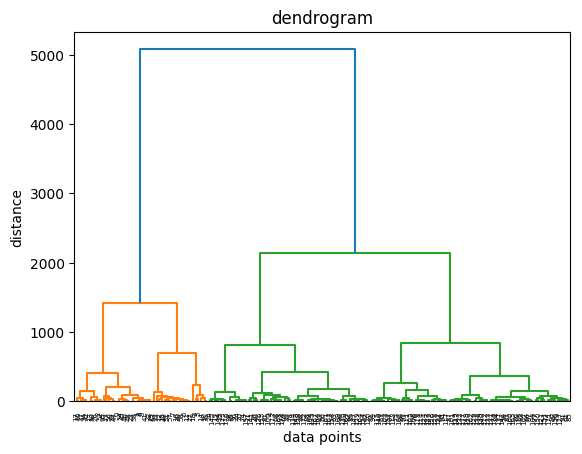

In [ ]:
dg=sh.dendrogram(sh.linkage(data,method="ward"))
plt.title("dendrogram")
plt.xlabel('data points')
plt.ylabel('distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ahc=AgglomerativeClustering(n_clusters=4,linkage='ward')
y_ahc=ahc.fit_predict(data)

In [ ]:
y_ahc

array([3, 3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 3, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [ ]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(data,y_ahc)

In [ ]:
sil_ahc

0.5606726948394264